In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from settings import PROJECT_PATH, FOR_THESIS_DIR
import comet_ml
import json

# Get credentials

In [4]:
with open(f"{PROJECT_PATH}/data/credentials/comet.json", 'r') as f:
    credentials = json.load(f)

api_key = credentials['api_key']
project_name = credentials['project_name']
workspace = credentials['workspace']

In [5]:
comet_api = comet_ml.API(rest_api_key=api_key)

COMET WARNING: rest_api_key has been deprecated; please use api_key instead


# Get one eye experiment data

In [4]:
exp = comet_api.get("lukaszsus/gaze-estimation/962448d750844c33a32890118dd1e4ab")

In [5]:
dir(exp)

['_ATTR_FIELD_MAP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_check_results',
 '_get_experiment_url',
 '_in_jupyter_environment',
 '_set_from_metadata',
 '_update_from_metadata',
 'add_tags',
 'archive',
 'archived',
 'create_symlink',
 'delete_asset',
 'display',
 'download_model',
 'duration_millis',
 'end',
 'end_server_timestamp',
 'file_name',
 'file_path',
 'get_additional_system_info',
 'get_asset',
 'get_asset_list',
 'get_code',
 'get_command',
 'get_curves',
 'get_environment_details',
 'get_executable',
 'get_git_metadata',
 'get_git_patch',
 'get_gpu_static_info',
 'get_hostname',
 'get_html',
 'get_installed_packages',
 'get_ip',
 'get_mac

In [6]:
df_metrics = pd.DataFrame(exp.get_metrics())

In [7]:
df_metrics = df_metrics.astype({"metricValue": float, "timestamp": int, "step": float,
                               "epoch": float, "offset": int})

### Błąd kątowy w zależności od epoki uczenia

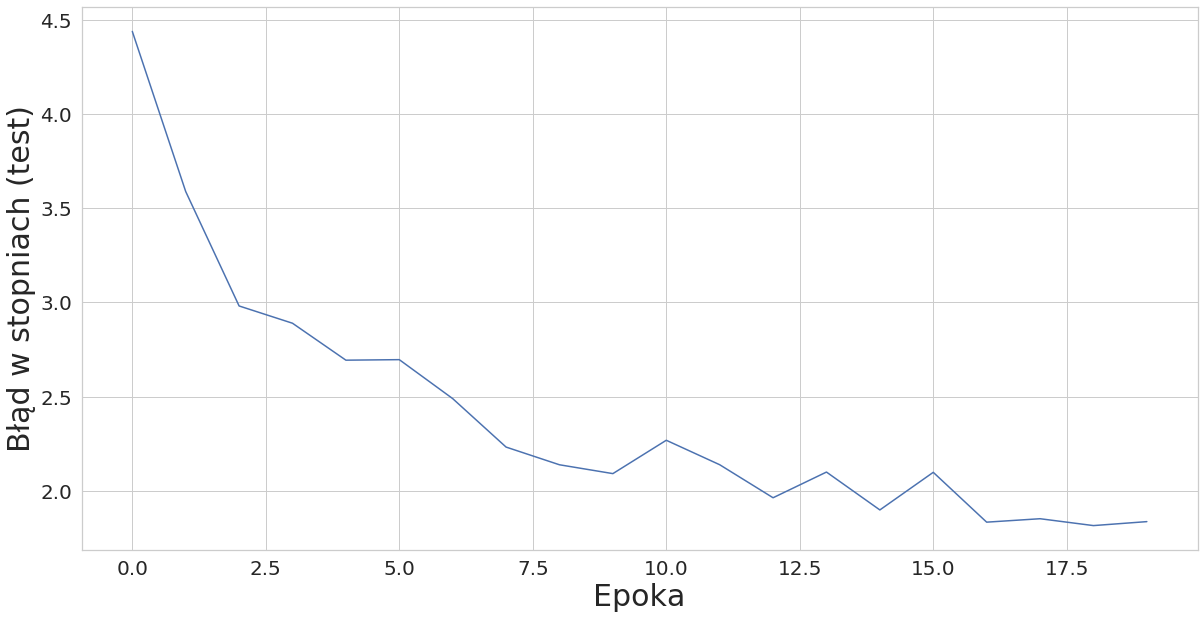

In [13]:
df_angle_error_degrees = df_metrics[df_metrics["metricName"] == "angle_error_degrees"]
df_angle_error_degrees = df_angle_error_degrees.rename({"metricValue": "Błąd w stopniach", "epoch": "Epoka"}, 
                                                      axis=1)
fig = plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(data=df_angle_error_degrees, y="Błąd w stopniach", x="Epoka")
ax.set_xlabel("Epoka", fontsize=30)
ax.set_ylabel("Błąd w stopniach (test)", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, 'one_eye_p00_angle_error.png'))

# One eye all together

In [35]:
exp = comet_api.get("lukaszsus/gaze-estimation/9aefbe8e65e8459c86c4be6f1148bfbf")

In [36]:
df_params = pd.DataFrame(exp.get_parameters_summary())
df_params

,name,valueMax,valueMin,valueCurrent,timestampMax,timestampMin,timestampCurrent,stepMax,stepMin,stepCurrent
0,Adam_amsgrad,false,false,false,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
1,Adam_beta_1,0.9,0.9,0.9,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
2,Adam_beta_2,0.999,0.999,0.999,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
3,Adam_decay,0.0,0.0,0.0,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
4,Adam_epsilon,1.0E-7,1.0E-7,1.0E-7,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
5,Adam_learning_rate,0.001,0.001,0.001,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
6,conv_sizes,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...",1579452973469,1579452973469,1579452973469,NaN,NaN,NaN
7,curr_epoch,29,29,29,1579453028293,1579453028293,1579453028293,28.0,28.0,28.0
8,curr_step,29,29,29,1579453028293,1579453028293,1579453028293,29.0,29.0,29.0
9,data_set_dataset_size,3000 per subject,3000 per subject,3000 per subject,1579452973468,1579452973468,1579452973468,NaN,NaN,NaN


In [37]:
df_metrics = pd.DataFrame(exp.get_metrics())

In [38]:
df_metrics["metricName"].unique()

array(['train_mean_squared_error', 'sys.gpu.0.gpu_utilization',
       'test_loss', 'test_mae_1', 'train_mae_1',
       'test_mean_absolute_error', 'train_loss',
       'train_mean_absolute_error', 'test_angle_error_degrees',
       'sys.gpu.0.total_memory', 'sys.gpu.0.free_memory', 'test_mae_0',
       'sys.gpu.0.used_memory', 'test_mean_squared_error', 'train_mae_0'],
      dtype=object)

In [39]:
df_metrics = df_metrics.astype({"metricValue": float, "timestamp": int, "step": float,
                               "epoch": float, "offset": int})

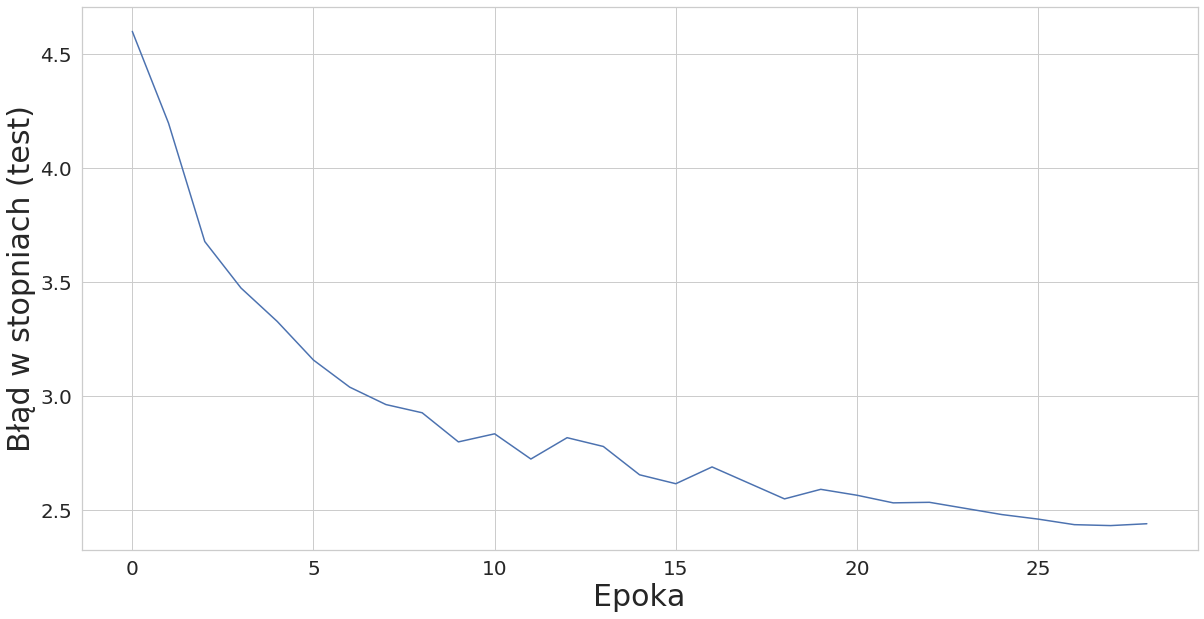

In [40]:
df_angle_error_degrees = df_metrics[df_metrics["metricName"] == "test_angle_error_degrees"]
df_angle_error_degrees = df_angle_error_degrees.rename({"metricValue": "Błąd w stopniach", "epoch": "Epoka"}, 
                                                      axis=1)
fig = plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(data=df_angle_error_degrees, y="Błąd w stopniach", x="Epoka")
ax.set_xlabel("Epoka", fontsize=30)
ax.set_ylabel("Błąd w stopniach (test)", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, 'one_eye_all_together_angle_error.png'))

In [41]:
def bar_plot_per_person(df):
    df = df[["person_id", "test_mean_absolute_error", "angle_error_degrees"]]
    df = df.dropna()
    df = df.astype({"person_id": int, "test_mean_absolute_error": float, "angle_error_degrees": float})
    df = df.groupby(["person_id"]).min()
    df = df.reset_index()
    
    df = df[["person_id", "angle_error_degrees"]]
    df = df.rename({"person_id": "Id osoby", "angle_error_degrees": "Błąd w stopniach"},
                                                        axis=1)
    mean = np.mean(df["Błąd w stopniach"].values)
    df = df.append([{"Id osoby": "średnia", "Błąd w stopniach": mean}], ignore_index=True)
    df = df.round({"Błąd w stopniach": 2})
    
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x="Id osoby", y="Błąd w stopniach", data=df.iloc[:-1, :])
    ax.set_xlabel("Id osoby", fontsize=30)
    ax.set_ylabel("Błąd w stopniach", fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(os.path.join(FOR_THESIS_DIR, 'one_eye_separately.png'))
    
    return df

# Both eyes coords

In [42]:
exp = comet_api.get("lukaszsus/gaze-estimation/5d11c87f245942978cf10187c4b8aef2")

In [43]:
df_params = pd.DataFrame(exp.get_parameters_summary())
df_params

,name,valueMax,valueMin,valueCurrent,timestampMax,timestampMin,timestampCurrent,stepMax,stepMin,stepCurrent
0,Adam_amsgrad,false,false,false,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
1,Adam_beta_1,0.9,0.9,0.9,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
2,Adam_beta_2,0.999,0.999,0.999,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
3,Adam_decay,0.0,0.0,0.0,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
4,Adam_epsilon,1.0E-7,1.0E-7,1.0E-7,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
5,Adam_learning_rate,0.001,0.001,0.001,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
6,conv_sizes,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...",1588611578470,1588611578470,1588611578470,NaN,NaN,NaN
7,curr_epoch,29,29,29,1588611702513,1588611702513,1588611702513,28.0,28.0,28.0
8,curr_step,29,29,29,1588611702513,1588611702513,1588611702513,29.0,29.0,29.0
9,data_set_dataset_size,3000 per subject,3000 per subject,3000 per subject,1588611578468,1588611578468,1588611578468,NaN,NaN,NaN


In [48]:
conv_sizes = json.loads(df_params.loc[6, "valueMax"])

In [49]:
conv_sizes

[{'n_filters': 16,
  'filter_size': [3, 3],
  'padding': 'valid',
  'stride': [1, 1],
  'pool': 'avg',
  'pool_size': [2, 2],
  'pool_stride': [2, 2]},
 {'n_filters': 16,
  'filter_size': [3, 3],
  'padding': 'valid',
  'stride': [1, 1],
  'pool': None,
  'pool_size': None,
  'pool_stride': None},
 {'n_filters': 16,
  'filter_size': [3, 3],
  'padding': 'valid',
  'stride': [1, 1],
  'pool': 'avg',
  'pool_size': [2, 2],
  'pool_stride': [2, 2]}]

# Own dataset + mpii gaze

In [6]:
exp = comet_api.get("lukaszsus/gaze-estimation/c3f1740ed9204251afeff55f0302b5b4")

In [8]:
exp.get_metrics()

[{'metricName': 'train_mean_squared_error',
  'metricValue': '0.04934766888618469',
  'timestamp': 1589925000261,
  'step': 0,
  'epoch': 0,
  'runContext': None,
  'offset': 74},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.025870203971862793',
  'timestamp': 1589925004681,
  'step': 1,
  'epoch': 1,
  'runContext': None,
  'offset': 114},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.02097380720078945',
  'timestamp': 1589925008827,
  'step': 2,
  'epoch': 2,
  'runContext': None,
  'offset': 154},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.018016234040260315',
  'timestamp': 1589925013069,
  'step': 3,
  'epoch': 3,
  'runContext': None,
  'offset': 194},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.015776073560118675',
  'timestamp': 1589925016841,
  'step': 4,
  'epoch': 4,
  'runContext': None,
  'offset': 230},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.014106476679444313',
  'times